In [1]:
import os
import json
import pickle

import torch

dataset_path = "../data/detect_dataset"
train_parts = json.load(open(os.path.join(dataset_path, "train_parts.json")))
train_parts

['train/part1.pkl',
 'train/part2.pkl',
 'train/part3.pkl',
 'train/part4.pkl',
 'train/part5.pkl',
 'train/part6.pkl',
 'train/part7.pkl',
 'train/part8.pkl',
 'train/part9.pkl',
 'train/part10.pkl',
 'train/part11.pkl',
 'train/part12.pkl',
 'train/part13.pkl',
 'train/part14.pkl',
 'train/part15.pkl',
 'train/part16.pkl',
 'train/part17.pkl',
 'train/part18.pkl',
 'train/part19.pkl',
 'train/part20.pkl',
 'train/part21.pkl',
 'train/part22.pkl',
 'train/part23.pkl',
 'train/part24.pkl',
 'train/part25.pkl',
 'train/part26.pkl',
 'train/part27.pkl',
 'train/part28.pkl',
 'train/part29.pkl',
 'train/part30.pkl',
 'train/part31.pkl',
 'train/part32.pkl',
 'train/part33.pkl',
 'train/part34.pkl',
 'train/part35.pkl',
 'train/part36.pkl',
 'train/part37.pkl',
 'train/part38.pkl',
 'train/part39.pkl',
 'train/part40.pkl',
 'train/part41.pkl',
 'train/part42.pkl',
 'train/part43.pkl',
 'train/part44.pkl',
 'train/part45.pkl',
 'train/part46.pkl',
 'train/part47.pkl',
 'train/part48.pkl',
 

In [2]:
for i in range(0, len(train_parts)):
    data = pickle.load(open(os.path.join(dataset_path, train_parts[i]), "rb"))
    if data[0].shape[0] != data[1].shape[0]:
        break
data

(array([[73.18630681, 62.32876267,  2.96852243,  3.9793023 ,  2.58030173,
          0.        ,  0.77411494,  0.22588506],
        [60.00078459, 68.30773309,  3.04435574,  4.01913291,  2.7583485 ,
          0.        ,  0.76185918,  0.23814082],
        [56.04899942, 71.32208408,  3.0564125 ,  4.06272968,  2.09864403,
          0.        ,  0.89473453,  0.10526547],
        [66.85542304, 59.58839698,  0.99084903,  1.00921753,  1.484953  ,
          1.        ,  0.10200661,  0.89799339],
        [54.13227651, 72.4188049 ,  0.98206688,  0.95665974,  0.98642788,
          1.        ,  0.15564495,  0.84435505],
        [64.41582962, 73.14487363,  0.99215223,  0.99766078,  2.90092136,
          1.        ,  0.12956887,  0.87043113]]),
 array([[7.22686400e+01, 6.37088786e+01, 3.01221255e+00, 4.08724881e+00,
         2.57732425e+00, 0.00000000e+00, 9.06560440e-01, 9.34395599e-02],
        [5.94356876e+01, 6.86342070e+01, 2.96545014e+00, 3.95185203e+00,
         2.75518986e+00, 0.00000000e+00,

In [3]:
ego_preds, cav_preds, K, match_gt, object_gt = data
ego_preds.shape, cav_preds.shape, K.shape, match_gt.shape, object_gt.shape

((6, 8), (7, 8), (42, 42), (6, 7), (6, 5))

In [4]:
import pygmtools as pygm

pygm.set_backend("pytorch")
n1, n2 = ego_preds.shape[0], cav_preds.shape[0]
K_tensor = torch.tensor(K, dtype=torch.float32)
dist_mat = torch.diag(K_tensor).view(n2, n1).T
dist_mat

tensor([[0.8801, 0.6028, 0.5510, 0.6007, 0.0000, 0.0000, 0.0000],
        [0.6042, 0.9416, 0.8014, 0.7213, 0.0000, 0.0000, 0.0000],
        [0.5707, 0.7840, 0.9528, 0.6694, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9318, 0.5546, 0.6243],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5631, 0.9007, 0.6563],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6100, 0.6533, 0.9476]])

In [5]:
match_output1 = pygm.hungarian(dist_mat)
match_output1

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])

In [6]:
match_gt

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int8)

In [ ]:
match_output2 = pygm.ipfp(K_tensor, n1, n2)
match_output2 = pygm.hungarian(match_output2)
# Compare the matching result with ground truth
print(
    "Match accuracy before swap:",
    (match_output2 == torch.tensor(match_gt, dtype=torch.float32)).all().item(),
)

# Create a copy of match_output2 and swap rows 0 and 2
swapped_match = match_output2.clone()
swapped_match[0], swapped_match[2] = swapped_match[2].clone(), swapped_match[0].clone()

# Print the swapped matrix
print("Swapped matching matrix:")
print(swapped_match)

# Check if the swapped matrix still matches the ground truth
print(
    "Match accuracy after swap:",
    (swapped_match == torch.tensor(match_gt, dtype=torch.float32)).all().item(),
)

# Restore original match_output2 for further use
match_output2 = torch.tensor(match_gt, dtype=torch.float32)
match_output2

Match accuracy before swap: True
Swapped matching matrix:
tensor([[0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])
Match accuracy after swap: False


tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])

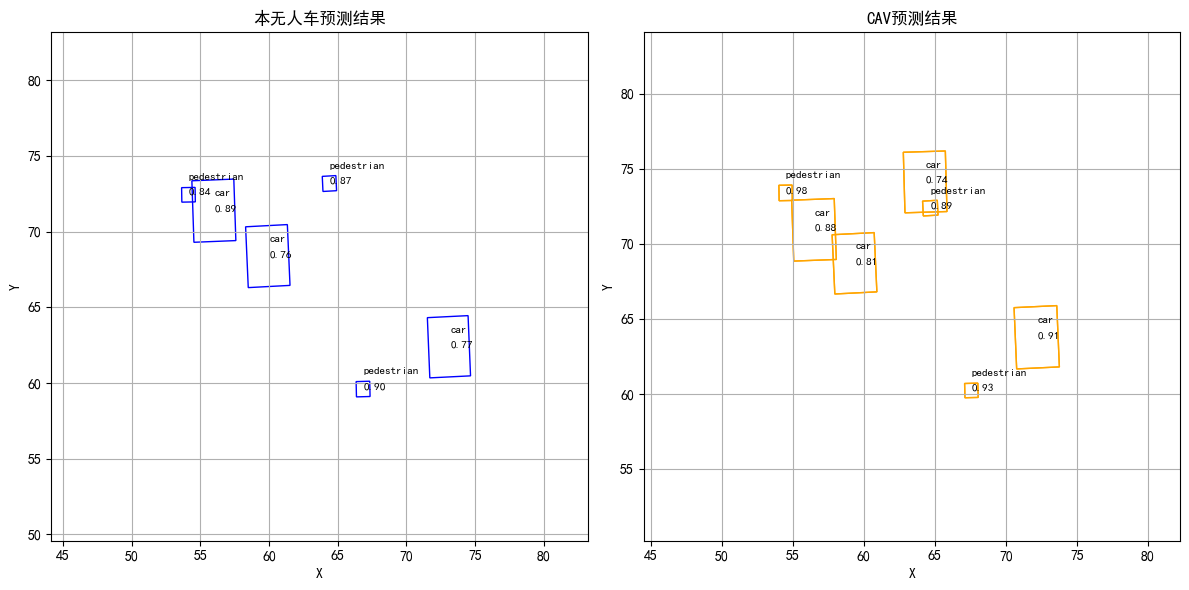

In [10]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.rcParams["font.family"] = "SimHei"

cls = ["car", "pedestrian"]
# First subplot for ego_preds
plt.subplot(1, 2, 1)
for i in range(ego_preds.shape[0]):
    color = "blue"
    x, y, w, h, dir = (
        ego_preds[i, 0],
        ego_preds[i, 1],
        ego_preds[i, 2],
        ego_preds[i, 3],
        ego_preds[i, 4],
    )
    # Determine color based on classification (car or pedestrian)
    # Create rectangle
    rect = plt.Rectangle(
        (x - w / 2, y - h / 2),
        w,
        h,
        angle=dir,
        linewidth=1,
        facecolor="none",
        edgecolor=color,
    )
    conf = np.max(ego_preds[i, 6:])
    plt.gca().add_patch(rect)
    plt.text(
        x,
        y,
        f"{conf:.2f}",
        fontsize=8,
    )
    # Add label
    label = cls[int(ego_preds[i, 5])]
    plt.text(x, y + 1, label, fontsize=8)


plt.xlim(min(ego_preds[:, 0]) - 10, max(ego_preds[:, 0]) + 10)
plt.ylim(min(ego_preds[:, 1]) - 10, max(ego_preds[:, 1]) + 10)
plt.title("本无人车预测结果")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

# Second subplot for cav_preds
plt.subplot(1, 2, 2)
for i in range(cav_preds.shape[0]):
    x, y, w, h, dir = (
        cav_preds[i, 0],
        cav_preds[i, 1],
        cav_preds[i, 2],
        cav_preds[i, 3],
        cav_preds[i, 4],
    )
    # Determine color based on classification (car or pedestrian)
    color = "orange"
    # Create rectangle
    rect = plt.Rectangle(
        (x - w / 2, y - h / 2),
        w,
        h,
        angle=dir,
        linewidth=1,
        edgecolor=color,
        facecolor="none",
    )
    plt.gca().add_patch(rect)
    conf = np.max(cav_preds[i, 6:])
    plt.gca().add_patch(rect)
    plt.text(
        x,
        y,
        f"{conf:.2f}",
        fontsize=8,
    )
    # Add label
    label = cls[int(cav_preds[i, 5])]
    plt.text(x, y + 1, label, fontsize=8)

plt.xlim(min(cav_preds[:, 0]) - 10, max(cav_preds[:, 0]) + 10)
plt.ylim(min(cav_preds[:, 1]) - 10, max(cav_preds[:, 1]) + 10)
plt.title("CAV预测结果")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.tight_layout()
plt.savefig("ego_cav.png", dpi=300)
plt.show()

In [11]:
def weighted_box_fusion(ego_boxes, cav_boxes, match_mat, confidence_threshold=0.5):
    """
    基于关联关系和检测置信度对检测框进行加权融合

    参数:
        ego_boxes: 自车检测框，形状为 [n, 7+]，每行为 [x, y, z, w, h, l, yaw, conf, ...]
        cav_boxes: 协作车检测框，形状为 [m, 7+]，每行为 [x, y, z, w, h, l, yaw, conf, ...]
        match_mat: 关联矩阵，形状为 [n, m]，值为0或1，1表示匹配
        confidence_threshold: 置信度阈值，低于该值的检测框不参与融合

    返回:
        fused_boxes: 融合后的检测框，形状为 [k, 7+]
        box_sources: 每个融合框的来源标记，1=仅自车，2=仅协作车，3=融合结果
    """
    ego_boxes = torch.tensor(ego_boxes, dtype=torch.float32)
    cav_boxes = torch.tensor(cav_boxes, dtype=torch.float32)
    match_mat = torch.tensor(match_mat, dtype=torch.float32)
    # 确保输入数据为浮点数
    n, m = match_mat.shape
    fused_boxes = []
    box_sources = []

    # 检查格式并确保至少有位置和尺寸信息
    assert ego_boxes.shape[1] >= 8, "自车检测框需要至少包含位置、尺寸、朝向和置信度"
    assert cav_boxes.shape[1] >= 8, "协作车检测框需要至少包含位置、尺寸、朝向和置信度"

    # 提取置信度
    ego_confs = torch.max(ego_boxes[:, 6:], dim=1)[0]
    cav_confs = torch.max(cav_boxes[:, 6:], dim=1)[0]
    # 创建处理标记，记录哪些框已被融合
    ego_processed = torch.zeros(n, dtype=torch.bool)
    cav_processed = torch.zeros(m, dtype=torch.bool)

    # 对每个匹配关系进行处理
    for i in range(n):
        for j in range(m):
            # 检查是否有匹配关系
            if match_mat[i, j] == 1 and not ego_processed[i] and not cav_processed[j]:
                # 检查置信度是否高于阈值
                ego_conf = ego_confs[i]
                cav_conf = cav_confs[j]

                if ego_conf < confidence_threshold and cav_conf < confidence_threshold:
                    continue

                # 标记这些框已被处理
                ego_processed[i] = True
                cav_processed[j] = True

                # 计算融合权重(基于各自的置信度)
                ego_weight = ego_conf
                cav_weight = cav_conf

                # 总权重归一化
                sum_weight = ego_weight + cav_weight
                if sum_weight > 0:
                    ego_weight = ego_weight / sum_weight
                    cav_weight = cav_weight / sum_weight
                else:
                    ego_weight = 0.5
                    cav_weight = 0.5

                # 获取两个检测框
                ego_box = ego_boxes[i]
                cav_box = cav_boxes[j]

                # 位置加权平均 (x, y)
                fused_pos = ego_box[:2] * ego_weight + cav_box[:2] * cav_weight

                # 尺寸加权平均 (w, h)
                fused_size = ego_box[2:4] * ego_weight + cav_box[2:4] * cav_weight

                # 朝向角度需要特殊处理 (循环值)
                # 计算角度差，确保在[-π, π]范围内
                angle_diff = (cav_box[5] - ego_box[5] + torch.pi) % (
                    2 * torch.pi
                ) - torch.pi
                fused_yaw = (ego_box[5] + angle_diff * cav_weight) % (2 * torch.pi)

                # 置信度取最大值
                fused_conf = torch.max(ego_conf, cav_conf).unsqueeze(0)

                # 构建融合框
                fused_box = torch.cat(
                    [
                        fused_pos,  # 位置
                        fused_size,  # 尺寸
                        fused_yaw.unsqueeze(0),  # 朝向
                        ego_box[4].unsqueeze(0),  # 分类
                        fused_conf,  # 置信度
                    ]
                )

                fused_boxes.append(fused_box)
                box_sources.append(3)  # 3表示融合结果

    # 处理未关联的自车检测框
    for i in range(n):
        if not ego_processed[i] and ego_confs[i] >= confidence_threshold:
            ego_boxes[i, 6] = ego_confs[i]
            fused_boxes.append(ego_boxes[i, :7])
            box_sources.append(1)  # 1表示仅自车

    # 处理未关联的协作车检测框
    for j in range(m):
        if not cav_processed[j] and cav_confs[j] >= confidence_threshold:
            cav_boxes[j, 6] = cav_confs[j]
            fused_boxes.append(cav_boxes[j, :7])
            box_sources.append(2)  # 2表示仅协作车

    # 转换为张量
    if len(fused_boxes) > 0:
        fused_boxes = torch.stack(fused_boxes)
    else:
        fused_boxes = torch.zeros((0, ego_boxes.shape[1]))

    box_sources = torch.tensor(box_sources)

    return fused_boxes, box_sources


fused_boxes, box_sources = weighted_box_fusion(
    ego_boxes=ego_preds,
    cav_boxes=cav_preds,
    match_mat=match_gt,
    confidence_threshold=0.5,
)
fused_boxes.shape, box_sources.shape

(torch.Size([7, 7]), torch.Size([7]))

In [13]:
fused_boxes1, box_sources1 = weighted_box_fusion(
    ego_boxes=ego_preds,
    cav_boxes=cav_preds,
    match_mat=swapped_match,
    confidence_threshold=0.5,
)
fused_boxes1.shape, box_sources1.shape

/var/folders/y5/cpd22g_13gj3f7ylq5d397jh0000gn/T/ipykernel_95023/2071483200.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  match_mat = torch.tensor(match_mat, dtype=torch.float32)


(torch.Size([7, 7]), torch.Size([7]))

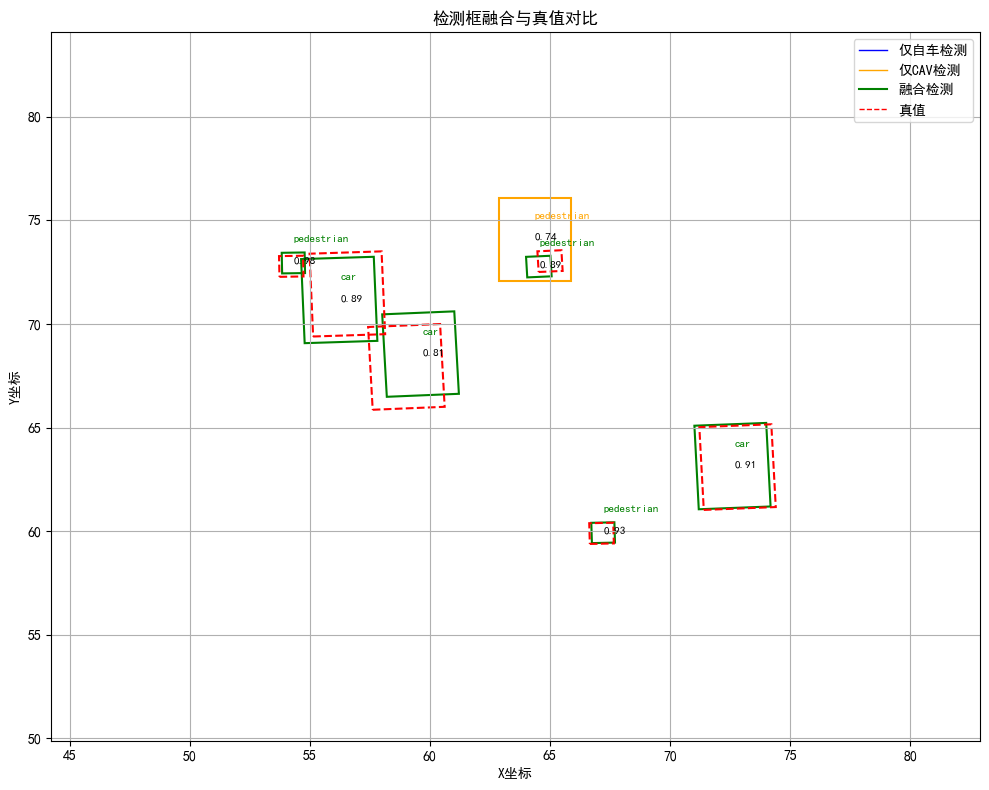

In [15]:
def visualize_boxes(boxes_list, sources_list, ground_truth=None, title="检测框可视化", 
                    save_path=None, cls_names=None):
    """
    可视化检测框、融合框和真值框的对比图
    
    参数:
        boxes_list: 检测框列表，每个元素为torch.Tensor，格式为[x, y, w, h, cls_id, yaw, conf]
        sources_list: 检测框来源列表，对应boxes_list中每个框的来源
        ground_truth: 可选，真值框，numpy数组，格式为[x, y, w, h, yaw]
        title: 图表标题
        save_path: 可选，图像保存路径
        cls_names: 类别名称列表
    """
    if cls_names is None:
        cls_names = ["car", "pedestrian"]
        
    plt.figure(figsize=(10, 8))
    plt.rcParams["font.family"] = "SimHei"

    # Define colors for different sources
    colors = {
        1: "blue",    # Ego vehicle only
        2: "orange",  # CAV only
        3: "green",   # Fused boxes
    }

    # Get all boxes for setting plot limits
    all_x = []
    all_y = []
    
    # Draw the detection boxes
    for boxes, sources in zip(boxes_list, sources_list):
        for i in range(boxes.shape[0]):
            x, y, w, h, cls_id, yaw, conf = boxes[i, :7].tolist()
            source = sources[i].item()
            all_x.append(x)
            all_y.append(y)

            # Create rectangle
            rect = plt.Rectangle(
                (x - w / 2, y - h / 2),
                w,
                h,
                angle=yaw,
                linewidth=1.5,
                edgecolor=colors[source],
                facecolor="none",
            )
            plt.gca().add_patch(rect)

            # Add confidence text
            plt.text(x, y, f"{conf:.2f}", fontsize=8)

            # Add label
            label = cls_names[int(cls_id)]
            plt.text(x, y + 1, label, fontsize=8, color=colors[source])

    # Draw ground truth boxes with red dashed lines if provided
    if ground_truth is not None:
        for i in range(ground_truth.shape[0]):
            x, y, w, h, yaw = ground_truth[i]
            all_x.append(x)
            all_y.append(y)

            # Create rectangle for ground truth
            rect = plt.Rectangle(
                (x - w / 2, y - h / 2),
                w,
                h,
                angle=yaw,
                linewidth=1.5,
                edgecolor="red",
                facecolor="none",
                linestyle="--",
            )
            plt.gca().add_patch(rect)

    # Set plotting limits with some margin
    if all_x and all_y:
        x_margin, y_margin = 10, 10
        plt.xlim(min(all_x) - x_margin, max(all_x) + x_margin)
        plt.ylim(min(all_y) - y_margin, max(all_y) + y_margin)
    
    # Add legend
    plt.plot([], [], color="blue", linewidth=1, label="仅自车检测")
    plt.plot([], [], color="orange", linewidth=1, label="仅CAV检测")
    plt.plot([], [], color="green", linewidth=1.5, label="融合检测")
    if ground_truth is not None:
        plt.plot([], [], color="red", linestyle="--", linewidth=1, label="真值")
    plt.legend()

    plt.title(title)
    plt.xlabel("X坐标")
    plt.ylabel("Y坐标")
    plt.grid(True)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()


# 使用函数可视化融合结果与真值对比
visualize_boxes(
    boxes_list=[fused_boxes], 
    sources_list=[box_sources],
    ground_truth=object_gt,
    title="检测框融合与真值对比",
    save_path="fused_boxes.png",
    cls_names=cls
)


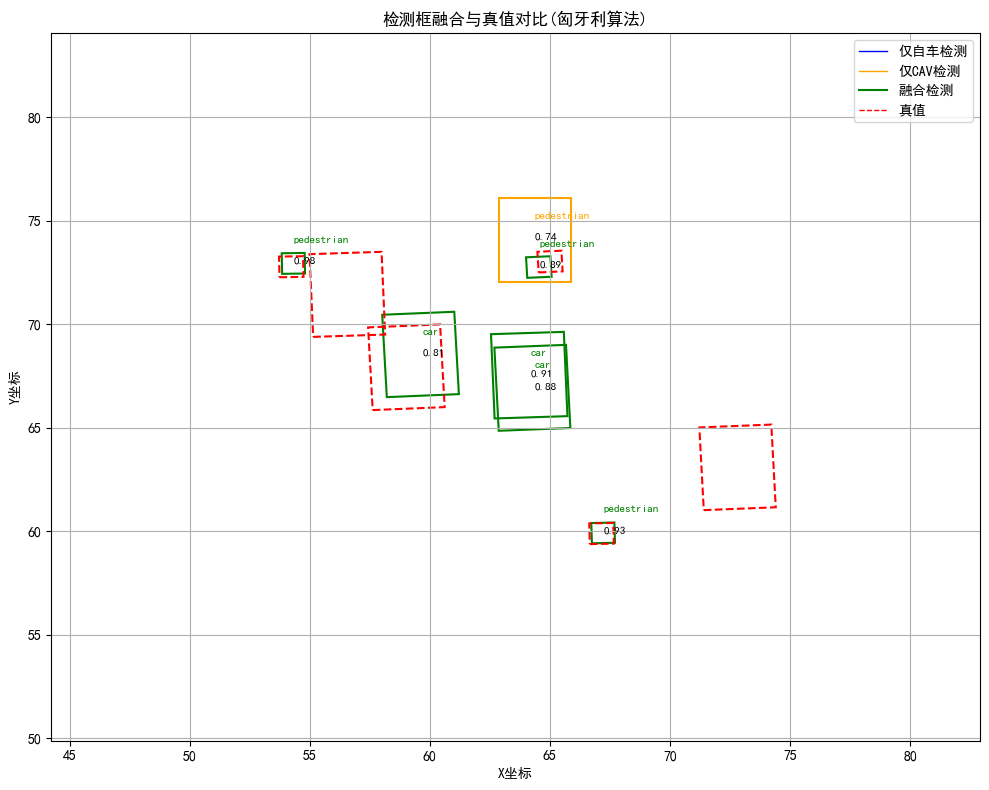

In [16]:
visualize_boxes(
    boxes_list=[fused_boxes1], 
    sources_list=[box_sources1],
    ground_truth=object_gt,
    title="检测框融合与真值对比(匈牙利算法)",
    save_path="fused_boxes1.png",
    cls_names=cls
)